# 선형회귀(자동차 연비 예측)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers

### 데이터 준비

In [2]:
# !gdown https://raw.githubusercontent.com/devdio/datasets/main/auto-mpg.csv

In [3]:
auto_mpg = pd.read_csv('https://raw.githubusercontent.com/devdio/datasets/main/auto-mpg.csv',na_values=['?']) # 데이터를만나면 결측치로바꿔라
df = auto_mpg
df.shape

(398, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [5]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [7]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [8]:
df['origin'].value_counts()

1    249
3     79
2     70
Name: origin, dtype: int64

In [9]:
X = df.drop(['mpg','car name','origin'],axis=1)
y = df['mpg']
X.shape,y.shape

((398, 6), (398,))

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2022,
                                                 test_size=0.2)
X_train.shape,X_test.shape

((318, 6), (80, 6))

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
y_train = y_train.values

In [12]:
type(y_train),type(X_train)

(numpy.ndarray, numpy.ndarray)

In [13]:
model = keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=(6,)),
    layers.Dense(32,activation='relu'),
    layers.Dense(1)
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,561
Trainable params: 2,561
Non-trainable params: 0
_________________________________________________________________


In [15]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model.compile(
          optimizer='adam',
          loss='mse',
          metrics=['mse','mae'])

In [16]:
EPOCHS = 3000
BATCH_SIZE = 32

history = model.fit(X_train,y_train,
          epochs = EPOCHS,
          batch_size = BATCH_SIZE,
          validation_split = 0.2,
          callbacks=[callback]
        )


Epoch 1/3000
8/8 [==============================] - 1s 29ms/step - loss: 592.9152 - mse: 592.9152 - mae: 23.0089 - val_loss: 674.9551 - val_mse: 674.9551 - val_mae: 24.6015
Epoch 2/3000
8/8 [==============================] - 0s 5ms/step - loss: 577.6860 - mse: 577.6860 - mae: 22.6550 - val_loss: 658.1516 - val_mse: 658.1516 - val_mae: 24.2501
Epoch 3/3000
8/8 [==============================] - 0s 5ms/step - loss: 560.5421 - mse: 560.5421 - mae: 22.2507 - val_loss: 637.8895 - val_mse: 637.8895 - val_mae: 23.8218
Epoch 4/3000
8/8 [==============================] - 0s 5ms/step - loss: 539.6113 - mse: 539.6113 - mae: 21.7575 - val_loss: 613.4664 - val_mse: 613.4664 - val_mae: 23.2983
Epoch 5/3000
8/8 [==============================] - 0s 5ms/step - loss: 514.6635 - mse: 514.6635 - mae: 21.1524 - val_loss: 582.8123 - val_mse: 582.8123 - val_mae: 22.6386
Epoch 6/3000
8/8 [==============================] - 0s 6ms/step - loss: 483.0450 - mse: 483.0450 - mae: 20.3880 - val_loss: 544.6993 - val_

In [17]:
# 로그확인
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])

In [18]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  plt.plot(hist['epoch'],hist['mse'],label='Train MSE')
  plt.plot(hist['epoch'],hist['val_mse'],label='Val MSE')
  plt.legend()
  plt.show()


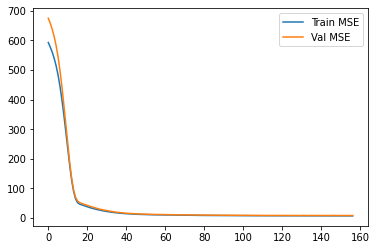

In [19]:
plot_history(history)

In [20]:
## 예측

X_test = scaler.transform(X_test)
y_test = y_test.values


In [21]:
y_pred = model.predict(X_test)
y_pred

3/3 [==============================] - 0s 4ms/step


array([[32.145477],
       [34.899647],
       [25.43369 ],
       [18.889473],
       [32.591526],
       [31.427563],
       [27.97631 ],
       [34.323864],
       [15.39971 ],
       [15.78576 ],
       [13.933436],
       [15.131534],
       [13.897095],
       [30.628891],
       [19.648714],
       [18.188402],
       [22.250341],
       [32.46509 ],
       [13.242974],
       [29.220055],
       [25.523746],
       [37.862076],
       [12.260244],
       [19.089006],
       [19.038609],
       [23.811834],
       [30.494467],
       [24.38021 ],
       [24.37312 ],
       [16.494099],
       [27.727175],
       [24.826042],
       [18.252506],
       [18.700872],
       [22.292292],
       [19.239456],
       [21.714317],
       [15.758371],
       [18.369532],
       [19.508875],
       [25.46917 ],
       [29.612762],
       [36.784927],
       [13.441047],
       [25.273869],
       [26.370975],
       [38.030975],
       [23.171852],
       [16.095016],
       [27.370722],


In [22]:
y_test
y_pred = y_pred.reshape(-1)
y_pred.shape

(80,)

In [23]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

6.813954963687715